In [7]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [8]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

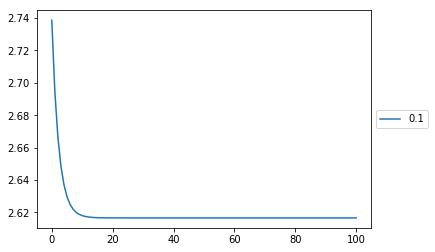

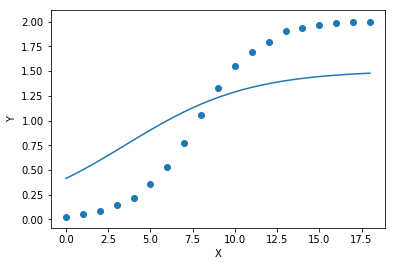

In [18]:
# libraries
from autograd import numpy as np
def std_norm(x):
    return(x-mu)/sigma
def rev_std_norm(x):
    return x*sigma+mu

def feature_transforms(x,w):
    f = np.tanh(w[0] + np.dot(x.T,w[1:])).T
    return f




# import the dataset
csvname = 'datasets/' + 'yeast.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:-1,:]
y = data[-1:,:]
mu = np.mean(x)
sigma = np.std(x)
x = std_norm(x)
N = len(x)
w = np.ones((N,1))
w = np.array((w,w))
alphas = [0.1]
cost_histories = []
weight_histories = []

for i in range(len(alphas)):
    weight_history,cost_history = gradient_descent(least_squares,alphas[i],100,w)
    weight_histories.append(weight_history)
    cost_histories.append(cost_history)
w = weight_histories[0][-1]
plot_cost_histories(cost_histories,alphas)
#print(w.size)
x = rev_std_norm(x)

plt.scatter(x,y)
x_v = np.linspace(0,18,50)
y_v = w[0][0]+w[1][0]*np.tanh(w[0][0]+w[1][0]*std_norm(x_v))
plt.plot(x_v,y_v)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [4]:
def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

In [5]:
def model(x,w):
    a =  np.dot(x.T,w)
    return a.T